In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=fetch_california_housing()

In [4]:
X=data.data
y=data.target.reshape(-1,1)

In [5]:
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=tts(x_train,y_train,test_size=0.1,random_state=0)

In [6]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_val=sc.fit_transform(x_val)

In [7]:
model=Sequential()
model.add(Dense(20, input_dim=x_train.shape[1],activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(10,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(5,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))

#With dropout

In [10]:
model=Sequential()
model.add(Dense(20, input_dim=x_train.shape[1],activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))

In [11]:
model.compile(loss="mse",optimizer="adam",metrics=["mse"])
m1=model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=100, verbose=0)

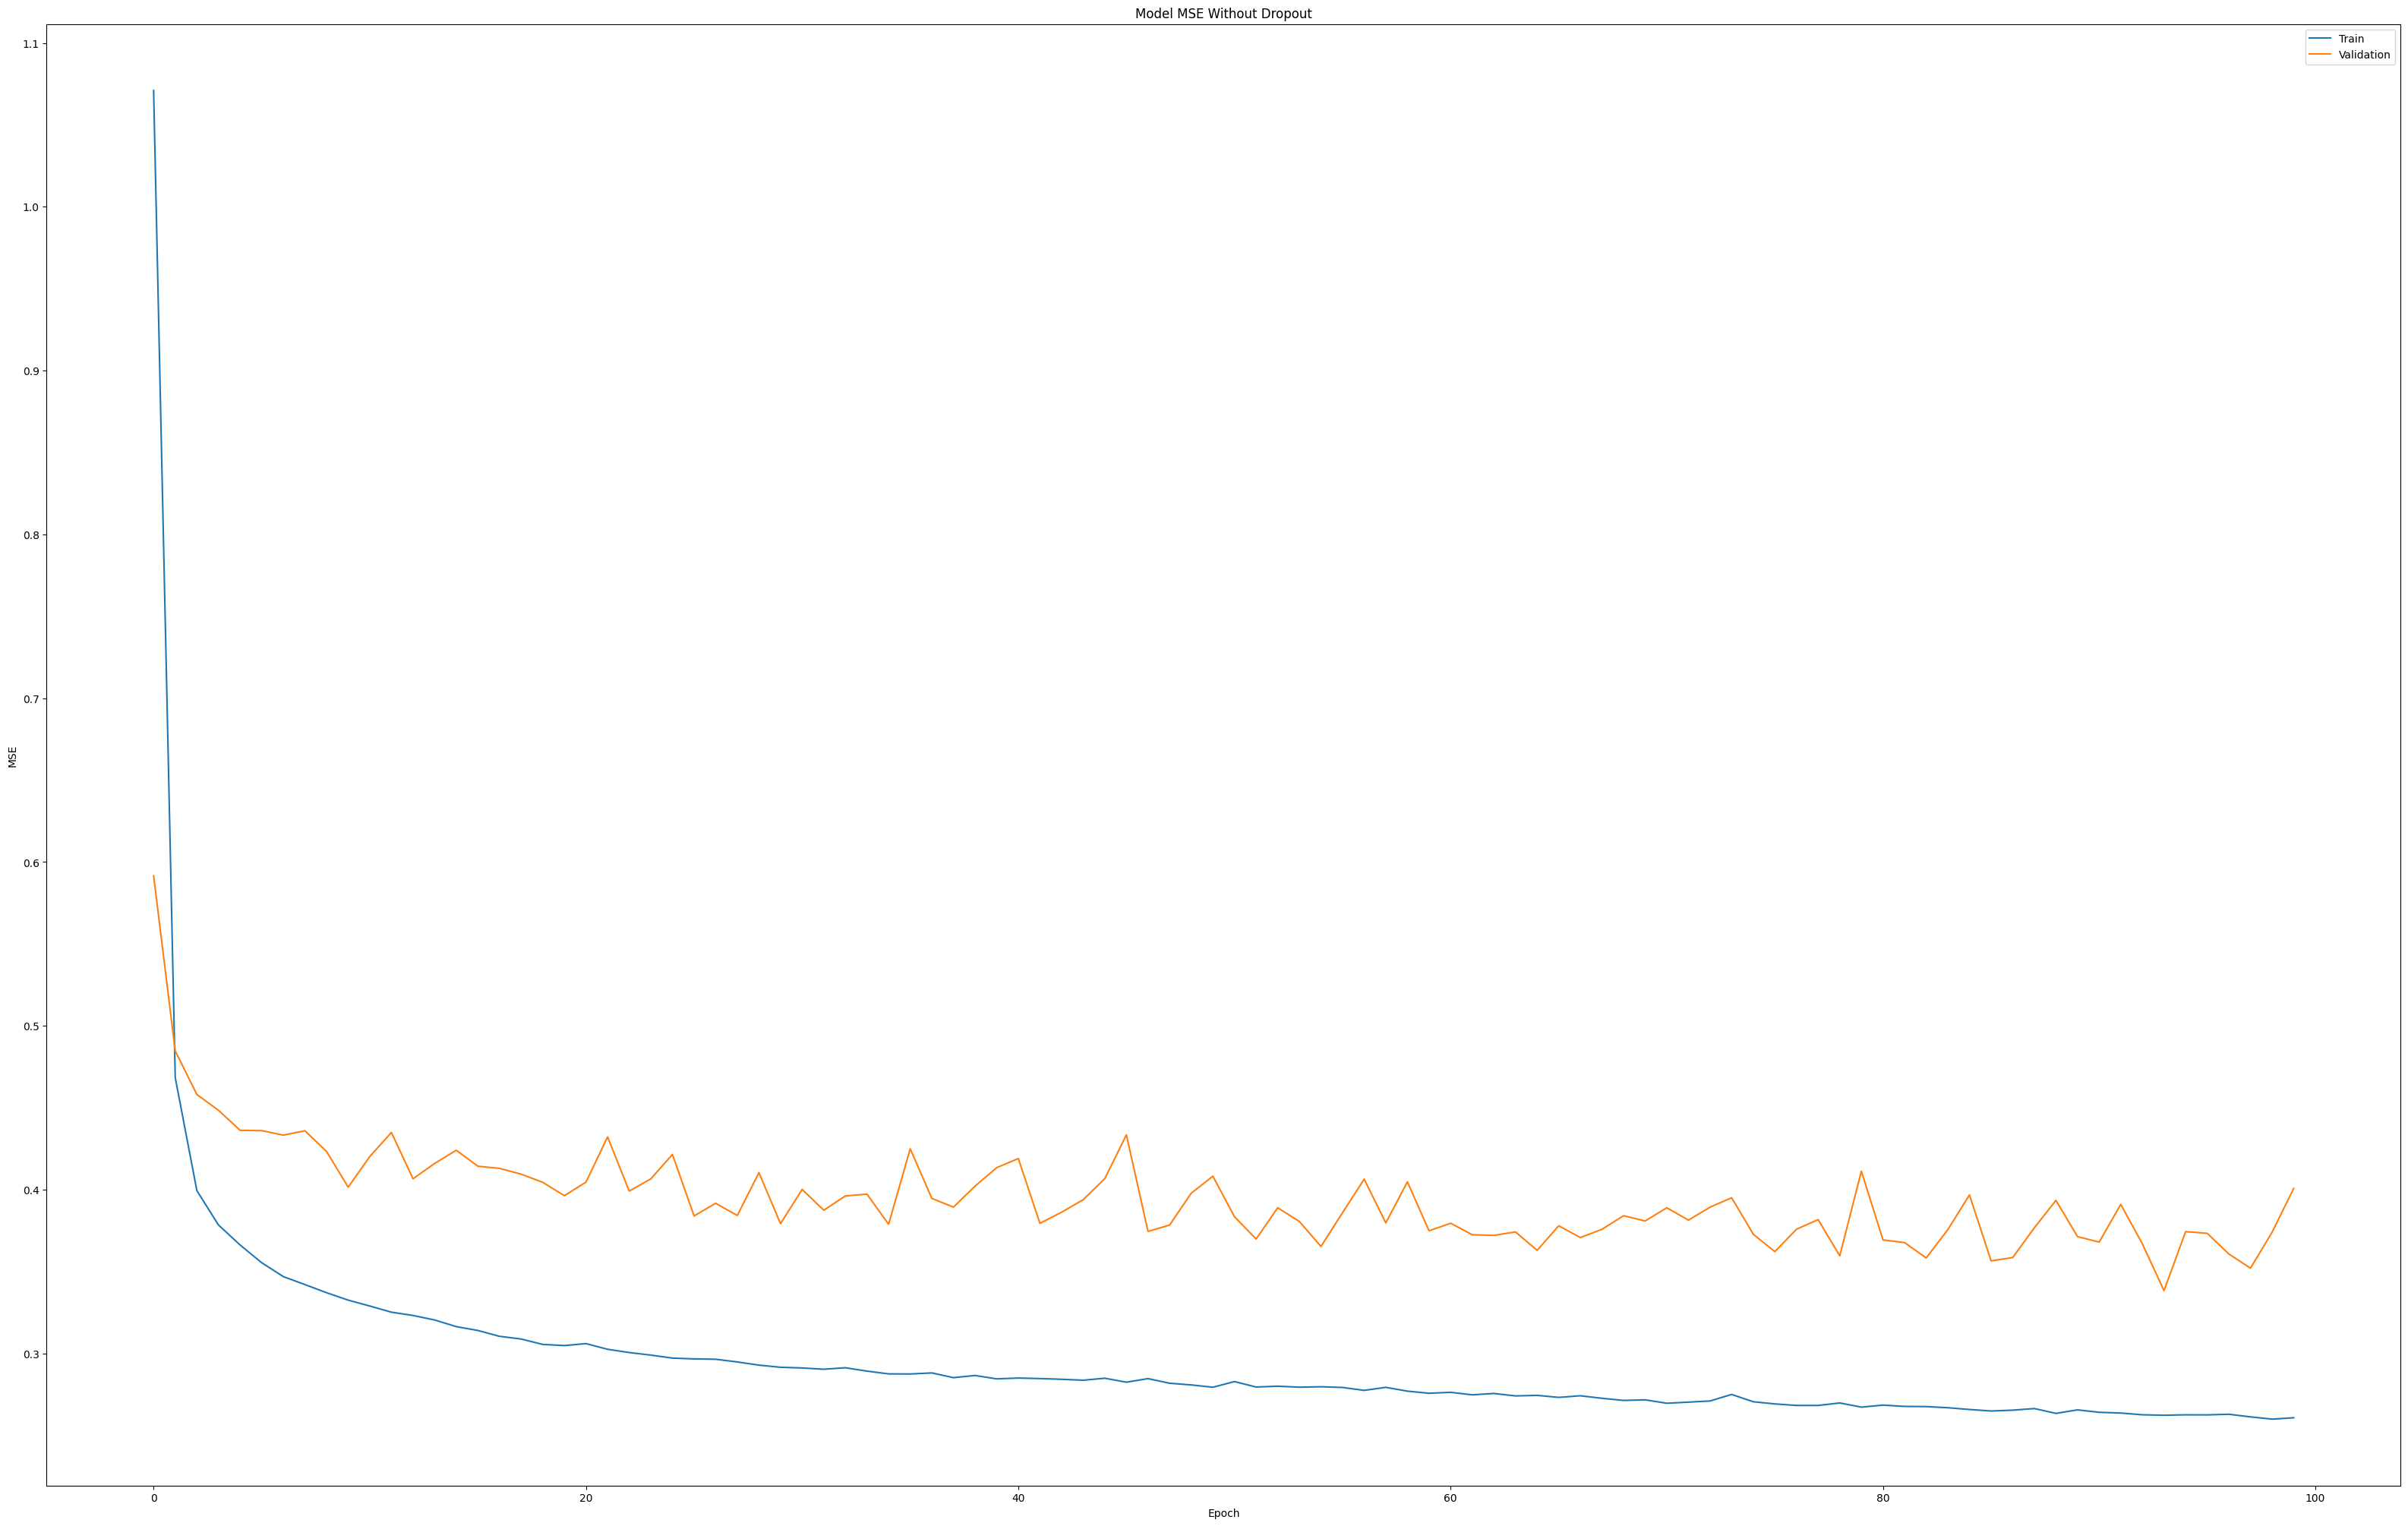

In [9]:
plt.figure(figsize=(40, 25))
plt.plot(m1.history["mse"])
plt.plot(m1.history["val_mse"])
plt.title("Model MSE Without Dropout")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"],loc="upper right")
plt.show()


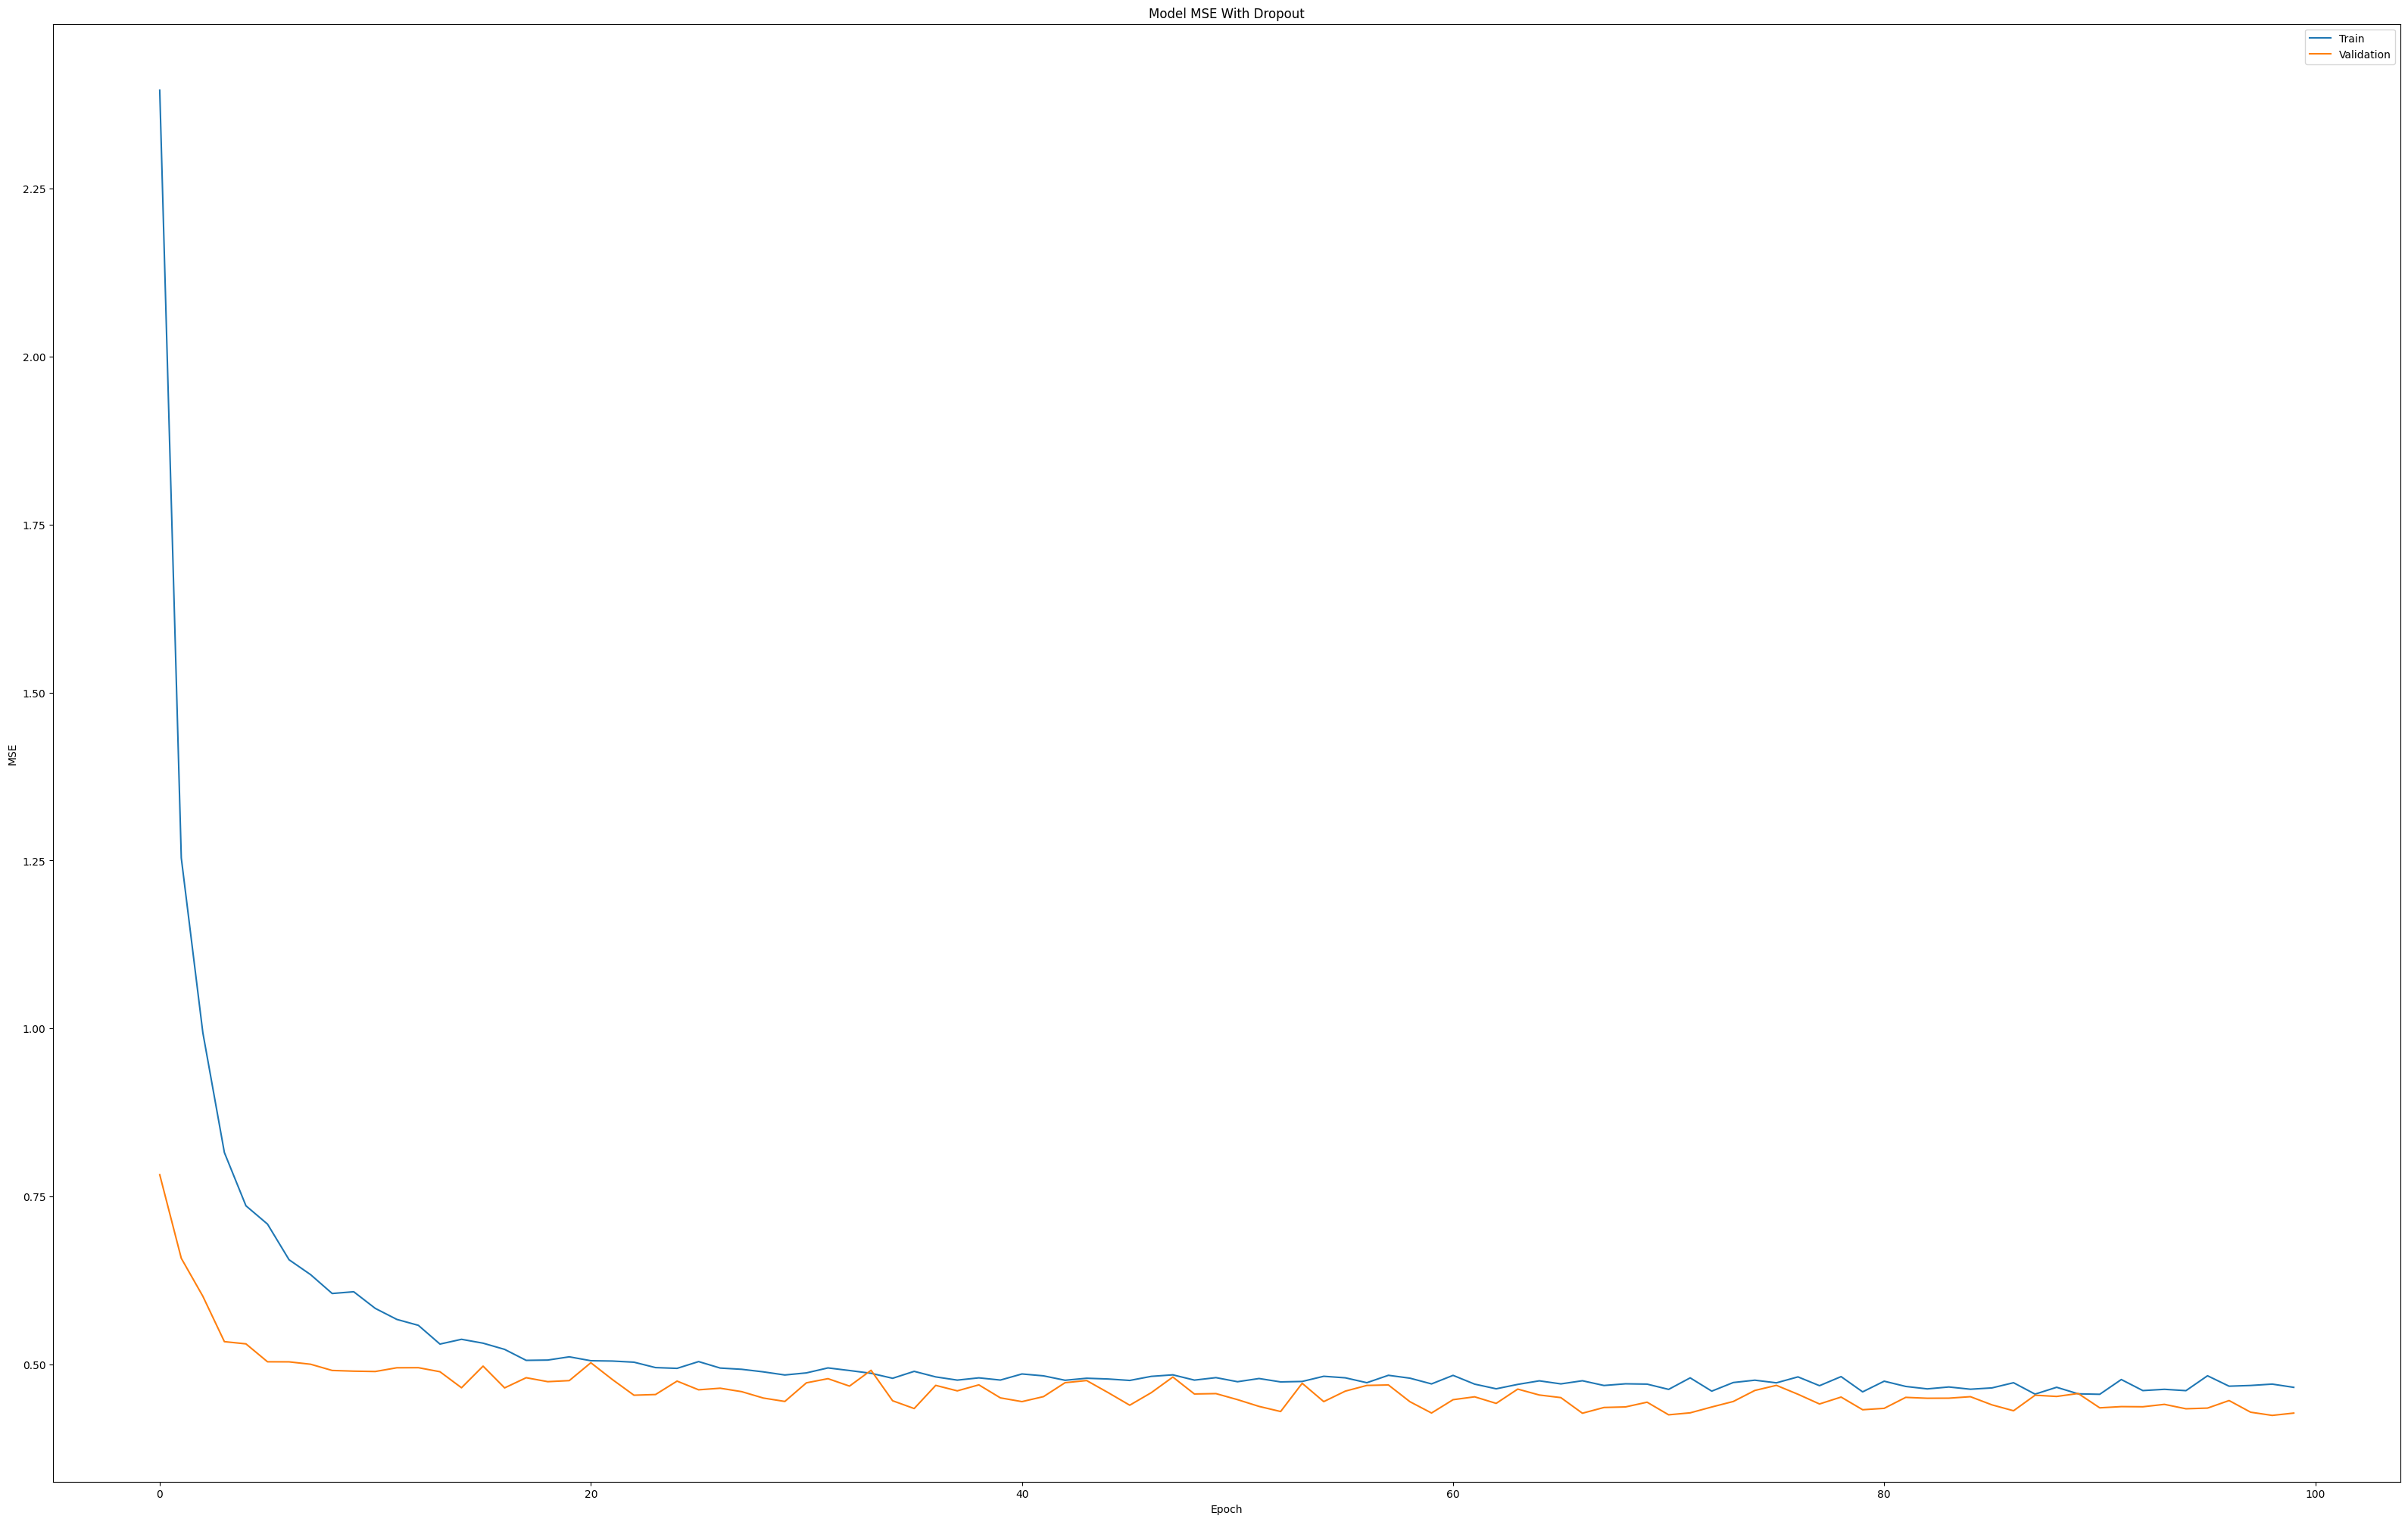

In [12]:
plt.figure(figsize=(40, 25))
plt.plot(m1.history["mse"])
plt.plot(m1.history["val_mse"])
plt.title("Model MSE With Dropout")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()
